Time Series

- collecting dxata at regular intervales

**ADDITIVE MODEL**
- represent a TS as a combinatino fo patterns at diffferent scales.
- Decompose pieces

## QUANDL FINANCIAL LIBRARY
- https://www.quandl.com/tools/python
- https://github.com/quandl/quandl-python

In [1]:
#!pip install quandl

In [2]:
import quandl

In [3]:
import pandas as pd

In [16]:
# quandl.ApiConfig.api_key = 'getyourownkey!'

tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


In [17]:
tesla_copy = tesla.copy()
gm_copy = gm.copy()

## EDA

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

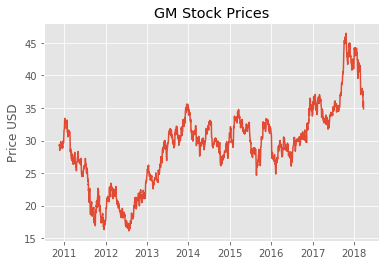

In [19]:
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Prices')
plt.ylabel('Price USD')
plt.show()


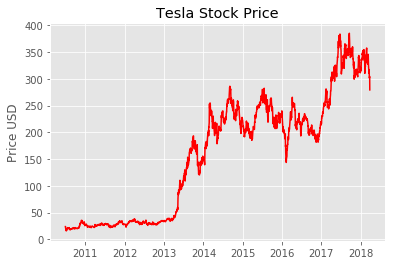

In [20]:
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price USD')
plt.show()

In [21]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

# create a year column
tesla['Year'] = tesla.index.year

# Move dates from index to column
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0

# calculate market cap

for i, year in enumerate(tesla['Year']):
    
    shares = tesla_shares.get(year)
    
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']



C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [23]:
# create a year column
gm['Year'] = gm.index.year

# Move dates from index to column
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0

# calculate market cap

for i, year in enumerate(gm['Year']):
    
    shares = gm_shares.get(year)
    
    gm.ix[i, 'cap'] = shares * gm.ix[i, 'Adj. Close']



C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [27]:
# Merge Datasets
cars = gm.merge(tesla, how = 'inner', on = 'Date')

cars.rename(columns = {'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)

In [28]:
cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]

In [29]:
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

In [30]:
cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


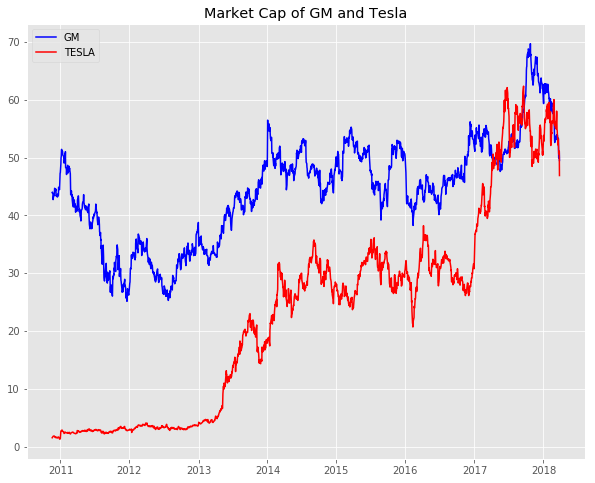

In [33]:
plt.figure(figsize=(10,8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.title('Market Cap of GM and Tesla')
plt.legend()
plt.show()
plt.show()

In [37]:
import numpy as np

#find first and last time Tesla was valued higher than GM
first_date = cars.loc[(np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0]))), 'Date']
last_date = cars.loc[(np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0]))), 'Date']

print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.
